# Histogram & Box Plot

In [32]:
import ( 
    "gonum.org/v1/plot" 
    "gonum.org/v1/plot/plotter" 
    "github.com/go-gota/gota/dataframe"
    "github.com/janpfeifer/gonb/gonbui"
)

In [33]:
func getDataframe(file string) (dataframe.DataFrame, error) {
    var df dataframe.DataFrame 
    f, err := os.Open(file)
    if err != nil {
        return df, err
    }
    defer f.Close()

    return dataframe.ReadCSV(f), nil
}

In [37]:
func createPlot(data []float64, name string, plotType string) []byte {
    v := make(plotter.Values, len(data)) 
    for i, floatVal := range data { 
        v[i] = floatVal 
    }
    
    p := plot.New() 
    p.Title.Text = fmt.Sprintf("%s of a %s", plotType, name) 
    
    switch plotType {
	case "Box Plot":
		b, err := plotter.NewBoxPlot(vg.Points(50), 0, v) 
        if err != nil { 
            log.Fatal(err) 
        }
        p.Add(b)
	default:
		h, err := plotter.NewHist(v, 16) 
        if err != nil { 
            log.Fatal(err) 
        }
        h.Normalize(1) 
        p.Add(h)
	}
    
    
    buf := bytes.NewBuffer(nil)
    writerTo, err := p.WriterTo(4*vg.Inch, 4*vg.Inch, "png")
    if err != nil {
        panic(err)
    }
    writerTo.WriteTo(buf)
    return buf.Bytes()
}


In [38]:
func display(df dataframe.DataFrame, col string, plotType string) {
    data := df.Col(col).Float() 
    gonbui.DisplayPng(createPlot(data, col, plotType))
}

## Histogram

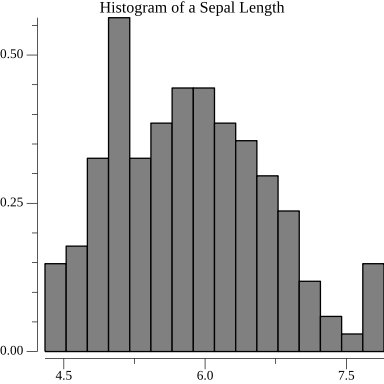

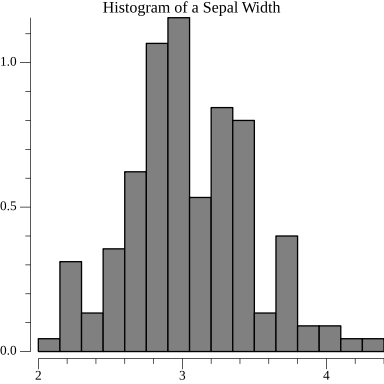

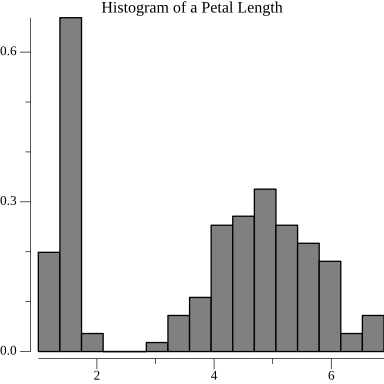

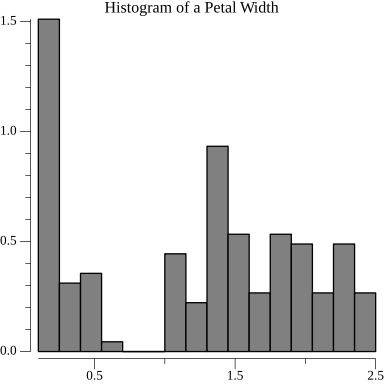

In [39]:
%%
df, err := getDataframe("../data/iris.csv")
if err != nil {
    fmt.Println(err)
    return
}

for _, col := range df.Names() {
    if (col != "Species") {
        display(df, col, "Histogram")
    }
}

## Box Plot

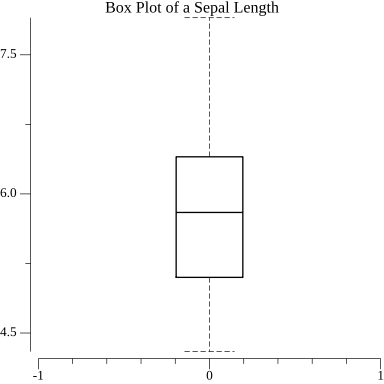

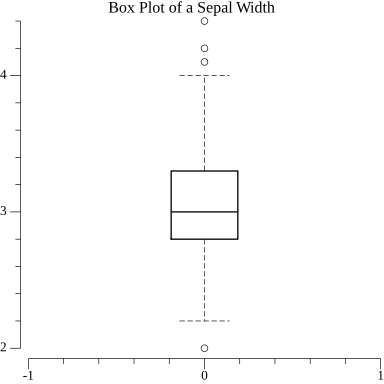

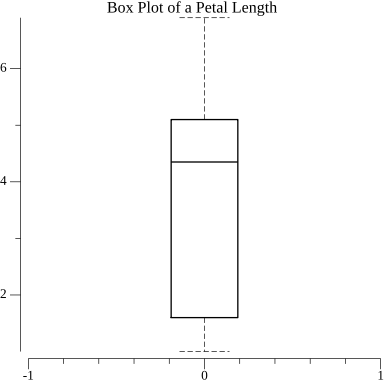

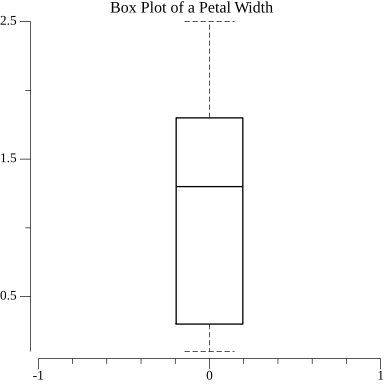

In [40]:
%%
df, err := getDataframe("../data/iris.csv")
if err != nil {
    fmt.Println(err)
    return
}

for _, col := range df.Names() {
    if (col != "Species") {
        display(df, col, "Box Plot")
    }
}